In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn

In [7]:
df = pd.read_excel ('/Users/justinmester/Documents/Studium/Data_Science/Analyse/transfermarkt_clean.xlsx')
df.head(10)

,Unnamed: 0,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,0,Ederson,5600000000,31,1993-08-17,Manchester City,Torwart,188,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,1,Claudio Bravo,120000000,1,1983-04-13,Manchester City,Torwart,184,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,2,John Stones,3600000000,5,1994-05-28,Manchester City,Innenverteidiger,188,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom
3,3,Eric García,630000000,50,2001-01-09,Manchester City,Innenverteidiger,183,Barcelona,Premier League,20,2.177432,41.382894,España
4,4,Joel Latibeaudiere,100000,-,2000-01-06,Man City U23,Innenverteidiger,180,Doncaster,Premier League,21,-1.133531,53.522768,United Kingdom
5,5,Oleksandr Zinchenko,2400000000,11,1996-12-15,Manchester City,Linker Verteidiger,175,"Radomyshl, Zhytomyr ...",Premier League,24,29.228959,50.496181,Україна
6,6,João Cancelo,3600000000,27,1994-05-27,Manchester City,Rechter Verteidiger,182,Barreiro,Premier League,26,-9.047857,38.634066,Portugal
7,7,Fernandinho,800000000,25,1985-05-04,Manchester City,Defensives Mittelfeld,179,Londrina,Premier League,35,-51.159502,-23.311288,Brasil
8,8,Phil Foden,2700000000,47,2000-05-28,Manchester City,Zentrales Mittelfeld,171,Stockport,Premier League,20,-2.160243,53.407901,United Kingdom
9,9,David Silva,1200000000,21,1986-01-08,Manchester City,Offensives Mittelfeld,170,Arguineguín,Premier League,35,-15.681350,27.759075,España


In [8]:
del df['Unnamed: 0']
df.head(3)

,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,Ederson,5600000000,31,1993-08-17,Manchester City,Torwart,188,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,Claudio Bravo,120000000,1,1983-04-13,Manchester City,Torwart,184,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,John Stones,3600000000,5,1994-05-28,Manchester City,Innenverteidiger,188,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom


In [31]:
df[['Values','Age']].describe()

,Values,Age
count,2.091400e+04,20914.000000
mean,2.855292e+08,25.978866
std,9.420569e+08,4.721866
min,2.500000e+04,16.000000
25%,1.500000e+05,22.000000
50%,3.250000e+05,26.000000
75%,1.200000e+08,29.000000
max,1.800000e+10,45.000000


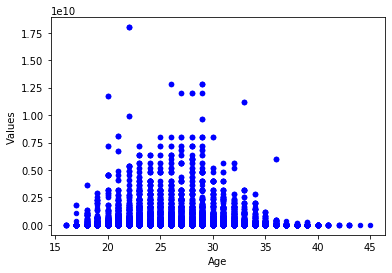

In [10]:
df.plot.scatter(x='Age',y='Values',c='Blue')

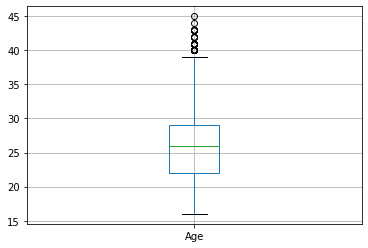

In [11]:
df.boxplot(column="Age")
plt.show()

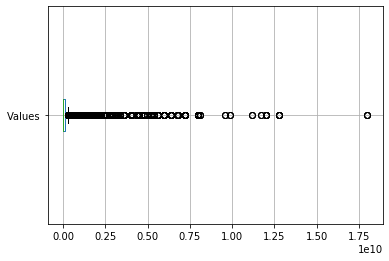

In [12]:
df.boxplot(column="Values", vert=False,)
plt.show()

          Values       Age
Values  1.000000  0.011567
Age     0.011567  1.000000


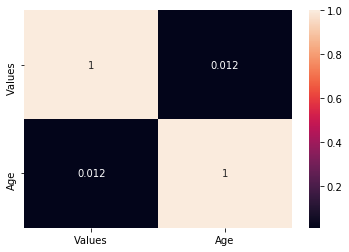

In [13]:
#df['Size'].astype('float')
dfcorr = df[['Values', 'Age' ,'Size']]
corrMatrix = dfcorr.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)

In [16]:
import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           z = df['Values'], 
           text = df['country'],
           colorbar = {'title':'Marktwert'})
layout = dict(title = 'Marktwert Summen', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [30]:
group_country = df[['Values' , 'country']].groupby("country").mean()
group_country
print(group_country.loc["Deutschland"])

Values    3.053282e+08
Name: Deutschland, dtype: float64
